In [1]:
import ROOT as R

Welcome to ROOTaaS 6.06/06


In [2]:
import Configuration.higgs.Samples as S
import Modeling.higgs2.definitions as defs
import Modeling.higgs2.models as models
resultsDir = "/Users/vk/software/Analysis/files/higgs_analysis_files/results/vR1_20170217_1742"
glugluPath = resultsDir + "/" + "result__GluGlu_HToMuMu_M125_13TeV_powheg_pythia8__80X__Cert_271036-284044_13TeV_23Sep2016ReReco_Collisions16_JSON__69mb__Mu24.root"
jsonToUse = S.jsonfiles["2016_ReReco_36460"]
glugluMC = S.mcMoriond2017datasets["/GluGlu_HToMuMu_M125_13TeV_powheg_pythia8/RunIISummer16MiniAODv2-PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6-v1/MINIAODSIM"]
gaus1 = models.SingleGaus(models.defaultSingleGausInit)

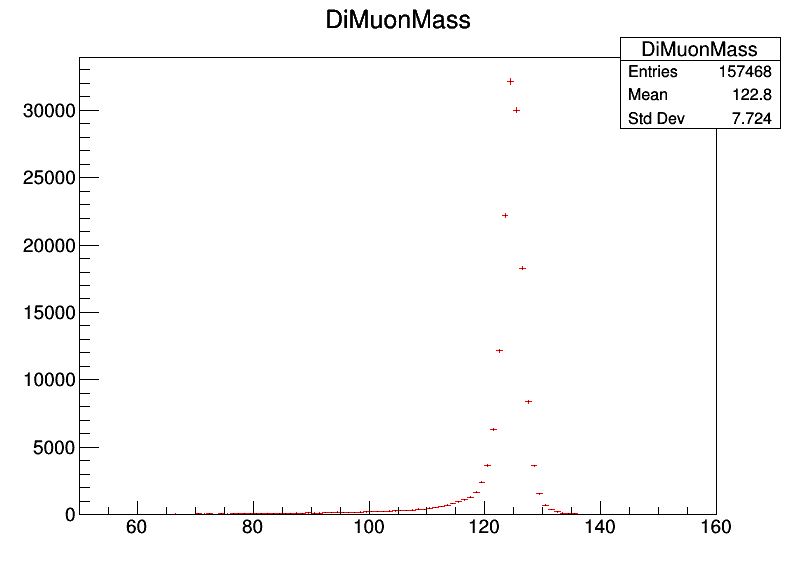

In [3]:
gluglu = defs.MC("NoCats", glugluPath, glugluMC, gaus1, color=R.kRed)
gluglu.tfile = R.TFile(gluglu.pathToFile)
gluglu.hist = gluglu.tfile.Get("NoCats/DiMuonMass")
canvas = R.TCanvas("c1", "c1", 800, 600)
canvas.cd()
gluglu.hist.SetLineColor(gluglu.color)
gluglu.hist.Draw()
canvas.Draw()

In [4]:
ws = R.RooWorkspace("higgs")
ws.factory("x[125.0, 110, 160]")
ws.var("x").SetTitle("m_{#mu#mu}")
ws.var("x").setUnit("GeV")
ws.defineSet("obs", "x")

False


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [5]:
gluglu.roohist = R.RooDataHist(gluglu.hist.GetName(), gluglu.hist.GetName(), R.RooArgList(ws.set("obs")), gluglu.hist)

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(DiMuonMass): fit range of variable x expanded to nearest bin boundaries: [110,160] --> [110,160]


In [6]:
cfg = defs.Empty()
cfg.ws = ws
cfg.higgsMass = 125
cfg.massFitMin = 115
cfg.massFitMax = 135
cfg.higgsResolution = 1.0

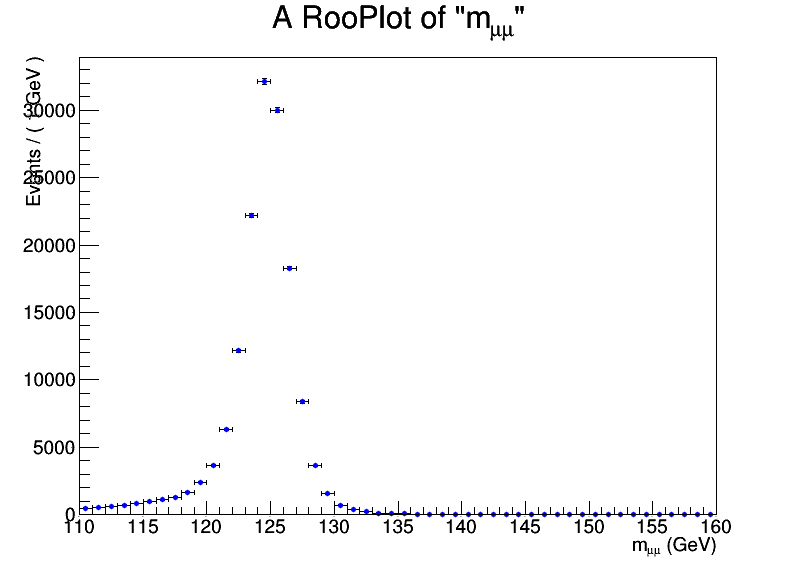

[#1] INFO:InputArguments -- RooAbsData::plotOn(DiMuonMass) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


In [7]:
gluglu.model.initialize(modelName="TestModel")
gluglu.model.createParameters(cfg)
someModel = gluglu.model.build(cfg)
#someModel.fitTo(gluglu.roohist, R.RooFit.Save(), R.RooFit.Range(cfg.massFitMin, cfg.massFitMax))
frame = ws.var("x").frame()
gluglu.roohist.plotOn(frame)
frame.Draw()
canvas.Draw()

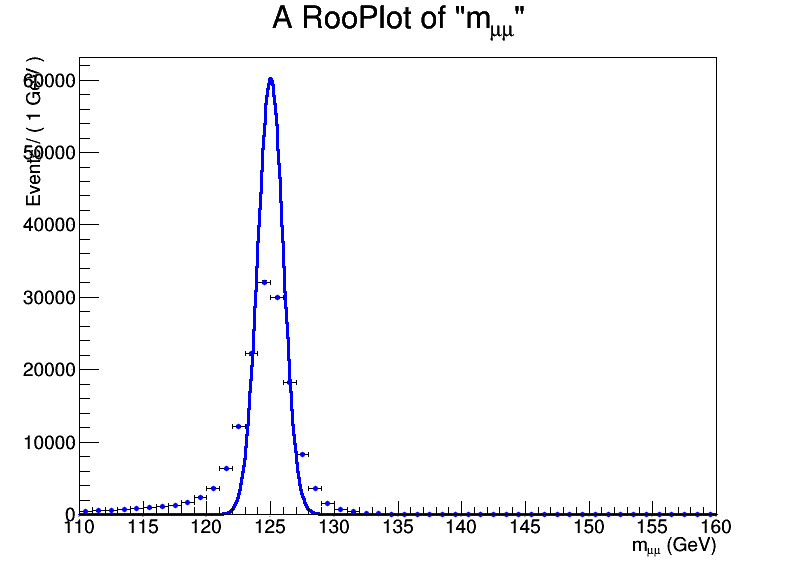

In [8]:
someModel.plotOn(frame)
frame.Draw()
canvas.Draw()

In [9]:
ws.Print("v")
print someModel
#r = someModel.fitTo(gluglu.roohist, R.RooFit.Save())

<ROOT.RooGaussian object ("TestModel") at 0x1176e6800>

RooWorkspace(higgs) higgs contents

variables
---------
(mean_TestModel,sigma_TestModel,x)

p.d.f.s
-------
RooGaussian::TestModel[ x=x mean=mean_TestModel sigma=sigma_TestModel ] = 1

named sets
----------
obs:(x)



In [10]:
someModel

<ROOT.RooGaussian object ("TestModel") at 0x1176e6800>

In [12]:
#r = someModel.fitTo(gluglu.roohist)
#print r
%%cpp
cout << "hello" << endl;

SyntaxError: invalid syntax (<ipython-input-12-296737054d9c>, line 3)